# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

# 1. Is the distribution of body temperatures normal?
Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


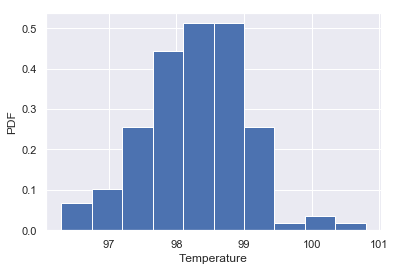

Mean:  98.24923076923075
St. Dev.:  0.730357778905038
Median:  98.3


In [4]:
sns.set()
temps = df['temperature']
_ = plt.hist(temps, bins = 10, density = True)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('PDF')
plt.show()

mean = np.mean(temps)
stdev = np.std(temps)
median = np.median(temps)
print('Mean: ', mean)
print('St. Dev.: ', stdev)
print('Median: ', median)

From this graph, the distribution does not appear to be normal, since it is not very symmetrical.  However, this could be a result of binning bias. 
Let's look at the ECDFs and the theoretical ECDF assuming data is normally distributed instead.

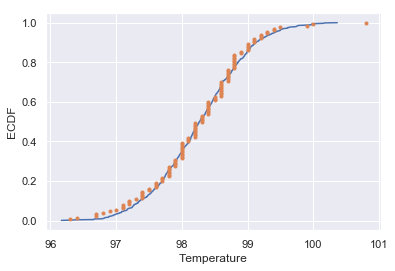

In [5]:
samples = np.random.normal(mean, stdev, size = 1000)

x = np.sort(temps)
y = np.arange(1, len(x)+1)/len(x)
x_theor = np.sort(samples)
y_theor = np.arange(1, len(x_theor)+1)/len(x_theor)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')

plt.show()

From this graph it still seems like the temp data may be normally distributed.
I will use a normality test from scipy, with the null hypothesis that the mean temps are normally distributed.  I will choose a signficance level of 0.05.

In [6]:
from scipy.stats import normaltest

print(normaltest(temps))

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)


Since the p-value is larger than 0.05, we do not have enough evidence to reject the null hypothesis.

# 2. Is the sample size large? Are the observations independent?

Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [7]:
#central limit theorem - n > 30

print(len(temps))
if len(temps) > 30:
    print('The sample size is large.')
else:
    print('The sample size is not large.')

130
The sample size is large.


# 3. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.

Null hypothesis: The true mean body temperature is 98.6 degrees Farenheit. <br>
Alt hyposthesis: The true mean body temperature is not 98.6 degrees Fahrenheit. <br>
Alpha = 0.05

In [8]:
#98.6 was the mean calculated by Carl Wunderlich
wunderlich_val = 98.6

#shift the temperature data to have a mean of 98.6 since we must assume the null hypothesis is true
temps_shifted = temps - np.mean(temps) + wunderlich_val

#use bootstrapping on the shifted data to simulate situation in which true population mean is 98.6 degrees F
def diff_from_wunderlich(data, wunderlich_value=98.6):
    return np.mean(data) - wunderlich_val

diff_obs = diff_from_wunderlich(temps)

def draw_bs_reps(data, func, size):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_sample)
    return bs_replicates

bs_replicates = draw_bs_reps(temps_shifted, diff_from_wunderlich, 100000) 

p_val = np.sum(bs_replicates <= diff_obs)/100000
print('The p-value is ', p_val)

The p-value is  0.0


This means that out of 100,000 samples of the shifted data, the difference between the mean of the sample and 98.6 was never as low as or lower than -0.4 (the mean of the temperature data minus the mean reported by Crl Wunderlich).  We can reject the null hypothesis (that the true population mean body temperature is 98.6 degrees F).

Now, let's try frequentist statistical testing. <br> Would you use a one-sample or two-sample test? Why? <br>
In this situation, is it appropriate to use the  𝑡 or  𝑧 statistic? 

I would use a one-sample test because we are comparing one dataset to a single number.
We are not comparing two datasets. <br>
It is appropriate to use the z-statistic because the sample size is greater than 30.

In [9]:
#z-test

from statsmodels.stats.weightstats import ztest

z_stat, p_z = ztest(temps, value=wunderlich_val)
print('The z-statistic is ', z_stat, ' and the associated p-value is ', p_z)

if p_z > 0.05:
    print('There is not enough evidence to reject the null hypothesis.')
else:
    print('We can reject the null hypothesis (that the true population mean body temp is 98.6 degrees F).')

The z-statistic is  -5.4548232923645195  and the associated p-value is  4.9021570141012155e-08
We can reject the null hypothesis (that the true population mean body temp is 98.6 degrees F).


Now try using the other test. How is the result be different? Why?

In [10]:
#t-test
from scipy.stats import ttest_1samp

t_stat, p_t = ttest_1samp(temps, wunderlich_val)
print('The t-statistic is ', t_stat, ' and the associated p-value is ', p_t)

if p_t > 0.05:
    print('There is not enough evidence to reject the null hypothesis.')
else:
    print('We can reject the null hypothesis (that the true population mean body temp is 98.6 degrees F).')

The t-statistic is  -5.4548232923645195  and the associated p-value is  2.4106320415561276e-07
We can reject the null hypothesis (that the true population mean body temp is 98.6 degrees F).


The t-statistic and z-statistic are the same, but the p-value we got using the t-test is slighlty larger than that from the z-test.  This is because the T distribution has fatter tails. 

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the 𝑡 and 𝑧 statistic?


In this case, it is correct to use the t-test because the sample size is less than 30.

In [11]:
small_samp = temps.sample(10)

t_stat, p_t = ttest_1samp(small_samp, wunderlich_val)
print('The t-statistic for the small sample of body temperatures is ', t_stat, ' and the associated p-value is ', p_t)

z_stat, p_z = ztest(small_samp, value=wunderlich_val)
print('The z-statistic for the small sample of body temperatures is ', z_stat, ' and the associated p-value is ', p_z)

The t-statistic for the small sample of body temperatures is  -3.146129192853986  and the associated p-value is  0.011810904124858964
The z-statistic for the small sample of body temperatures is  -3.146129192853986  and the associated p-value is  0.0016544690600471502


We again see that the t-test results in a higher p-value.  This time the differences is p-values given by a t-test and z-test is greater.  Had we chosen a significance level of 0.025, the z-test would have led to a rejection of the null hypothesis while the t-test would not have.  We see that as the sample size goes up, the p-values for the t-test approaches the p-value for the z-test.  

# 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. <br>
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.


In [20]:
#bootstrap approach - using function written in #3

from scipy.stats import norm

z_star = norm.ppf(0.975)

def draw_bs_reps(data, func, size):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_sample)
    return bs_replicates

bs_reps = np.empty(10000)
for i in range(10000):
    bs_reps[i] = np.random.choice(temps, 1)
    
bs_moe = z_star * np.std(bs_reps)
bs_conf_int = np.percentile(bs_reps, [2.5, 97.5])

print('Using the bootstrap approach the margin of error is ', bs_moe, 'and the 95% confidence interval is ', bs_conf_int)

Using the bootstrap approach the margin of error is  1.4161838479787423 and the 95% confidence interval is  [96.7 99.5]


We are 95% confident that the mean temperature is between 96.7 and 99.5 degrees. So we should consider abnormal temperatures anything below 96.7 or above 99.5 degrees Fahrenheit using the bootstrap method.

In [13]:
#frequentist approach


z_star = norm.ppf(0.975)

#In computing the margin of error, I will not divide by sqrt of the sample size because this will
moe = z_star * np.std(temps)
conf_int = (np.mean(temps)-moe, np.mean(temps)+moe)
print('Margin of error: ', moe)
print('95% confidence interval: ', conf_int)


Margin of error:  1.431474942482542
95% confidence interval:  (96.81775582674821, 99.68070571171329)


Using the frequentist approach, we are 95% confident that the mean body temperature falls between 96.818 and 99.681 degrees Fahrenheit.  <br>
So we would consider temperatures below 96.818 degrees Fahrenheit or above 99.681 degrees Fahrenheit abnormal.

# 6. Is there a significant difference between males and females in normal temperature? 
What testing approach did you use and why? <br>
Write a story with your conclusion in the context of the original problem.

First I will split the dataframe into two -- one for males and one for females.

In [14]:
male_df = df[df['gender'] == 'M']
female_df = df[df['gender'] == 'F']

male_temps = male_df['temperature']
female_temps = female_df['temperature']

print(len(male_temps), len(female_temps))

65 65


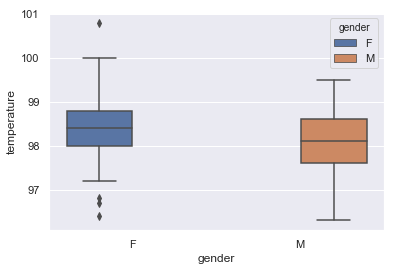

In [15]:
sns.boxplot(x='gender', y = 'temperature', data = df, hue = 'gender')
plt.show()

Based on the above boxplots, it appears that the mean temperature for females is higher than that of males but we will investigate further with a two-sample hypothesis test. <br>
I will use a two-sample hypothesis test because we are comparing the mean of two populations (male and female). <br>
I will use a z-statistic because the sample size is large. (65 males and 65 females)

Null hypothesis: There is no significant difference between males' and females'normal temperatures. <br>
Alt. hypothesis: Women have a higher normal body temperature than men, ie avg. male temp - avg. female temp < 0. <br> 
Significance level = 0.05 <br>
Our test statistic will be the difference between the mean male temperature and the mean female temperaute.

In [16]:

test_stat = np.mean(male_temps) - np.mean(female_temps)

#two-sided, two-sample hypothesis test
z, p_z = ztest(male_temps, female_temps, alternative = 'smaller')

print('z-score: ', z)
print('p-value: ', p_z)

z-score:  -2.2854345381656103
p-value:  0.011143680380328775


Since the p-value is less than the significance level of 0.05 we can reject the null hypothesis.  Female body temperatures are higher than female body temperatures.  

# Conclusion

In conclusion, the true mean normal body temperature is not 98.6 degress Fahrenheit.  
There is a difference in the normal body temperature of men and women, and women seem to have higher normal bosy temperatures.
